<a href="https://colab.research.google.com/github/saihaneesh26/java_6thsem/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#dataset link : 'https://archive.ics.uci.edu/ml/machine-learning-databases/00477/'
#REAL ESTATE VALUATION DATASET

In [ ]:
df = pd.read_excel('/content/Real estate valuation data set.xlsx')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
#simple linear regression
from sklearn.model_selection import train_test_split
X = df['X2 house age']
Y = df['Y house price of unit area']
x_train,x_test,y_train,y_test = train_test_split(X,Y,shuffle=True,train_size=200,random_state=42)

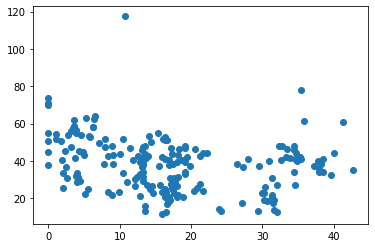

In [ ]:
plt.scatter(x_train,y_train)

In [ ]:
from scipy import stats
slope,intercept, r, p, std_error = stats.linregress(x_train,y_train)
print("slope:",slope)
print("intercept:",intercept)
print("coeffecient of correlation:",r)

slope: -0.32375615444811456
intercept: 43.59745448957305
coeffecient of correlation: -0.24919529721165343


In [ ]:
#y= mx+c
def myfunc(x):
  return slope*x + intercept

In [ ]:
predn = [] #stores corresponding y values for given x
# we will send x_train and store y got from linear regression line
for i in x_train:
  predn.append(myfunc(i))

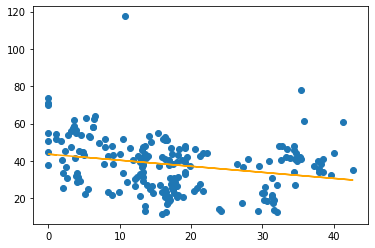

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train,predn,c='orange')

In [ ]:
print("Linear regression Line is: Y = {:.3f} X + {:.3f}".format(slope,intercept))

Linear regression Line is: Y = -0.324 X + 43.597


In [ ]:
#----------------------------------------------------------------------------------------------

In [ ]:
#prgm multiple linear regression
#x = x2,x3,x4
features = ['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores']
Xs =  df[features]
Y = df['Y house price of unit area']
Xs.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
0,32.0,84.87882,10
1,19.5,306.59470,9
2,13.3,561.98450,5
3,13.3,561.98450,5
4,5.0,390.56840,5


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xs,Y)

LinearRegression()

In [ ]:
print("Slope: ",model.coef_)
print("Intercept: ",model.intercept_)

Slope:  [-0.25285583 -0.00537913  1.29744248]
Intercept:  42.97728620606406


In [ ]:
print("EQN of multiple linear regression line: Y = {:.3f} + {:.3f} X2+{:.3f} X3+{:.3f} X4".format(model.intercept_,model.coef_[0],model.coef_[1],model.coef_[2])) 

EQN of multiple linear regression line: Y = 42.977 + -0.253 X2+-0.005 X3+1.297 X4


In [ ]:
def multi(slope,intercept,x):
  return slope*x+intercept

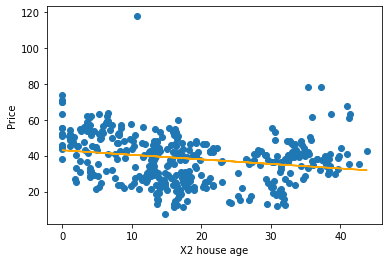

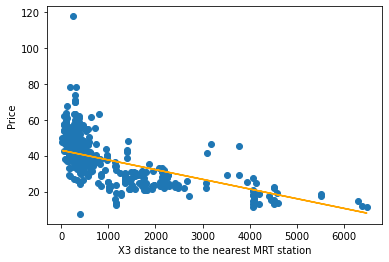

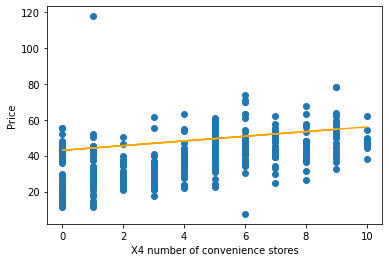

In [ ]:
for j in range(3):
  predn = []
  for i in Xs.iloc[:,j]:
    predn.append(multi(model.coef_[j],model.intercept_,i))
  plt.xlabel(features[j])
  plt.ylabel("Price")
  plt.scatter(Xs.iloc[:,j],Y)
  plt.plot(Xs.iloc[:,j],predn,c='orange')
  plt.show()

In [ ]:
#------------------------------------------------------------------------------------

In [ ]:
#prgm 3: Model Measurement Analysis
#https://archive.ics.uci.edu/ml/datasets/Qualitative_Bankruptcy
#Qualitative_Bankruptcy
df3 = pd.read_csv('/content/Qualitative_Bankruptcy.data.csv')
df3.head() 

,IR,MR,FF,Cr,Co,OR,y
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
encoder = LabelEncoder()
encoded_df = df3.apply(encoder.fit_transform)
encoded_df

,IR,MR,FF,Cr,Co,OR,y
0,2,2,0,0,0,2,1
1,1,1,0,0,0,1,1
2,0,0,0,0,0,0,1
3,2,2,2,2,2,2,1
4,1,1,2,2,2,1,1
...,...,...,...,...,...,...,...
245,1,1,0,1,1,1,0
246,2,1,1,1,1,1,0
247,0,1,1,1,1,1,0
248,1,1,1,1,1,1,0


In [ ]:
from sklearn import svm
model = svm.SVC(kernel='linear',probability=True) 
X = encoded_df.iloc[:,:-1]
Y = encoded_df.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 30,shuffle=True,random_state=42,stratify=Y)

In [ ]:
model.fit(x_train,y_train)
predn = model.predict(x_test)
predn_probs = model.predict_proba(x_test)
cm = confusion_matrix(y_test,predn)
cm

array([[ 5,  8],
       [ 5, 12]])

In [ ]:
TP,FP,FN,TN = confusion_matrix(y_test,predn).ravel()

In [ ]:
print("Accuracy: ",(TP+TN)/(TP+TN+FP+FN))
print("Precision: ",(TP)/(TP+FP))
print("Recall: ",(TP)/(TP+FN))

Accuracy:  0.5666666666666667
Precision:  0.38461538461538464
Recall:  0.5


In [ ]:
from sklearn.metrics import roc_curve
TPR,FPR,_ = roc_curve(y_test,predn_probs[:,1]) 

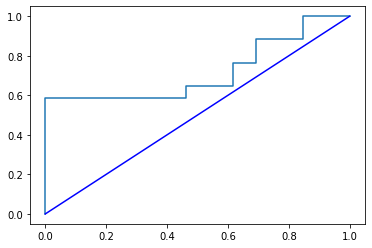

In [ ]:
plt.plot(TPR,FPR)
x = [0,1]
y = [0,1]
plt.plot(x,y,c='blue')
plt.show()

In [ ]:
# MCC
# TPR,FPR 
from sklearn.metrics import roc_auc_score
print("Auc score:",roc_auc_score(y_test,predn_probs[:,1]))

Auc score: 0.7194570135746606


In [ ]:
#----------------------

In [ ]:
# prgm6
# MLP
#encoded_df
from sklearn.neural_network import MLPClassifier
x_train,x_test,y_train,y_test = train_test_split(encoded_df.iloc[:,:-1].to_numpy(),encoded_df.iloc[:,-1].to_numpy())

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(6,5),learning_rate_init=0.01)
model.fit(x_train,y_train)
print(model.predict(np.array(x_test[0]).reshape(1,-1)))

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
y_test[0]

1

In [ ]:
no_of_training_samples = encoded_df.shape[0]
n_epochs = 10
batch_size = 32
train_scores = []
test_scores = []
for epoch in range(n_epochs):
  x_train,x_test,y_train,y_test = train_test_split(encoded_df.iloc[:,:-1],encoded_df.iloc[:,-1],shuffle=True,random_state=epoch)
  ptr = 0
  for i in range(no_of_training_samples//batch_size-1):
    model.partial_fit(x_train.iloc[(ptr):(ptr)+batch_size],y_train.iloc[(ptr):(ptr)+batch_size])
    ptr+=batch_size
  train_scores.append(model.score(x_train,y_train))
  test_scores.append(model.score(x_test,y_test))

In [ ]:
train_scores

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [ ]:
test_scores

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

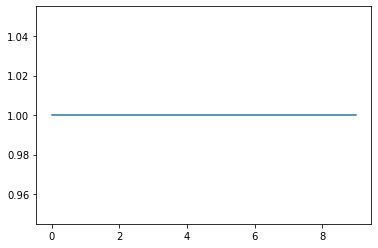

In [ ]:
plt.plot(train_scores)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/iris.csv')
df

,f1,f2,f3,f4,t
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score
df = df.apply(LabelEncoder().fit_transform)

In [ ]:
df

,f1,f2,f3,f4,t
0,8,14,4,1,0
1,6,9,4,1,0
2,4,11,3,1,0
3,3,10,5,1,0
4,7,15,4,1,0
...,...,...,...,...,...
145,24,9,28,19,2
146,20,4,26,15,2
147,22,9,28,16,2
148,19,13,30,19,2


In [ ]:
model = MultinomialNB()
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=50,random_state=42,shuffle=True)
model.fit(x_train,y_train)
predn = model.predict(x_test)
cm = confusion_matrix(y_test,predn)
print(cm)
print("Accuracy score:",accuracy_score(y_test,predn)) 

[[19  0  0]
 [ 0 14  1]
 [ 0  5 11]]
Accuracy score: 0.88


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df = df.drop(columns=['PassengerId','Name','Ticket','Cabin'])
df = df.dropna()
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
from sklearn.preprocessing import LabelEncoder
dfn = df.apply(LabelEncoder().fit_transform)
dfn['Fare'] = df['Fare']
dfn

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28,1,0,7.2500,2
1,1,0,0,51,1,0,71.2833,0
2,1,2,0,34,0,0,7.9250,2
3,1,0,0,47,1,0,53.1000,2
4,0,2,1,47,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
885,0,2,0,52,0,5,29.1250,1
886,0,1,1,35,0,0,13.0000,2
887,1,0,0,24,0,0,30.0000,2
889,1,0,1,34,0,0,30.0000,0


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
x = dfn.iloc[:,1:]
y = dfn.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=200,random_state=42,shuffle=True)
model.fit(x_train,y_train)
predn = model.predict(x_test)
print(confusion_matrix(y_test,predn))
print("accuracy score:",accuracy_score(y_test,predn))

[[88 23]
 [26 63]]
accuracy score: 0.755
